# Smartphone price prediction
 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

## Data Definition

**battery_power:** Total energy a battery can store in one time measured in mAh<br> 

**clock_speed:** Speed at which microprocessor executes instructions<br>

**fc:** Front Camera mega pixels<br>

**int_memory:** Internal Memory in Gigabytes<br>

**m_dep:** Mobile Depth in cm<br>

**mobile_wt:** Weight of mobile phone<br>

**n_cores:** Number of cores of processor<br>

**pc:** Primary Camera mega pixels<br>

**px_height:** Pixel Resolution Height<br>

**px_width:** Pixel Resolution Width<br>

**ram:** Random Access Memory in Mega Bytes<br>

**sc_h:** Screen Height of mobile in cm<br>

**sc_w:** Screen Width of mobile in cm<br>

**talk_time:** longest time that a single battery charge will last when you are<br>

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

<a id='set_options'></a>
# 2. Set Options

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)

<a id='RD'></a>
# 3. Read Data

In [5]:
df_mobile = pd.read_csv('Mobile_data.csv')
df_mobile.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [6]:
df_mobile.shape

(2000, 15)

In [7]:
df_mobile.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [8]:
df_mobile.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [9]:
# splitting features and the target variable
df_features = df_mobile.iloc[:, df_mobile.columns != 'price_range']

# consider the target variable
df_target = df_mobile.iloc[:, df_mobile.columns == 'price_range']

For numerical variables, use the describe()**

In [1]:
df_features.describe()

NameError: name 'df_features' is not defined

For the independent numeric variables, we plot the histogram to check the distribution of the variables.

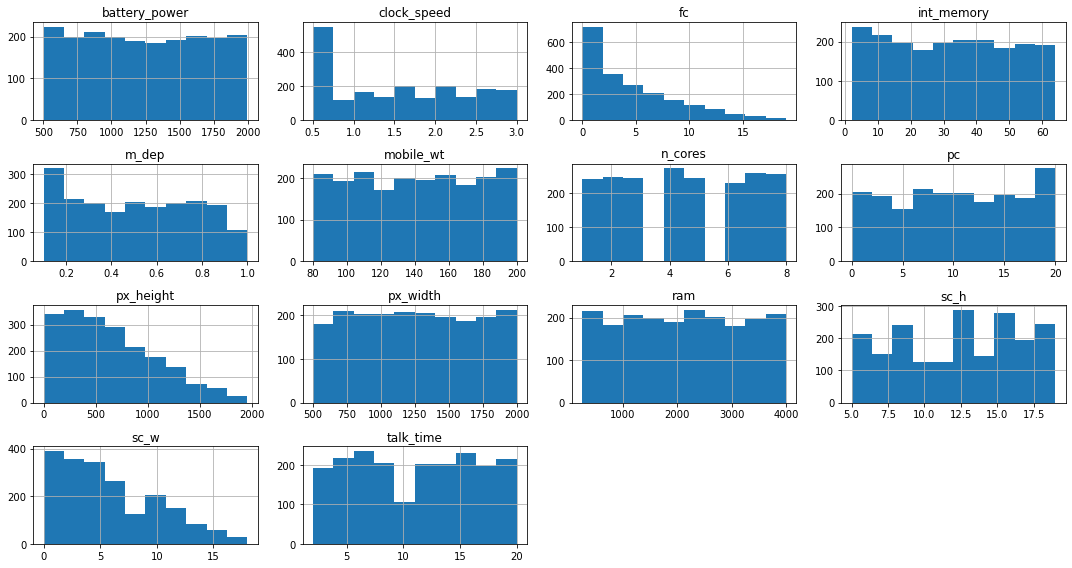

In [11]:
df_features.hist()

plt.tight_layout()

plt.show()  

We have split the dependent variable (RGD) and created a dataframe 'df_target'. Use this dataframe to check the distribution of RGD.

In [12]:
class_frequency = df_target.price_range.value_counts()
class_frequency

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

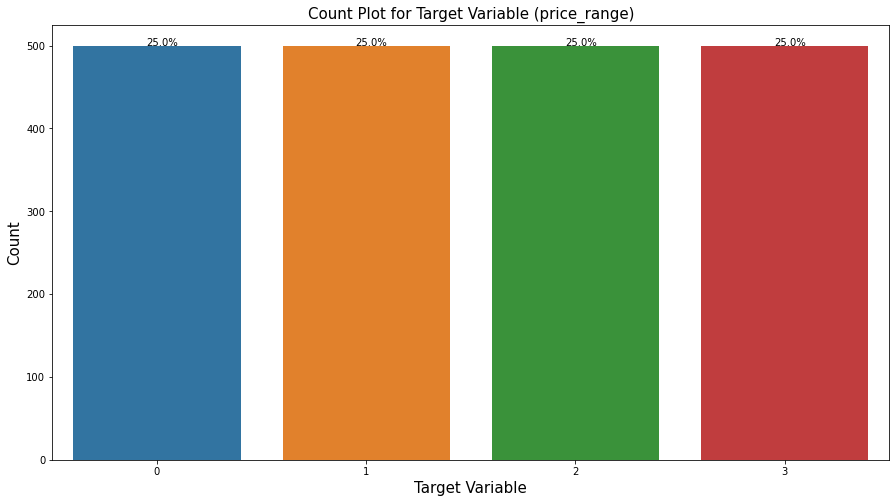

In [13]:
sns.countplot(x = df_target.price_range)

plt.text(x = -0.05, y = df_target.price_range.value_counts()[0], s = str((class_frequency[0])*100/len(df_target.price_range)) + '%')
plt.text(x = 0.95, y = df_target.price_range.value_counts()[1], s = str((class_frequency[1])*100/len(df_target.price_range)) + '%')
plt.text(x = 1.95, y = df_target.price_range.value_counts()[2], s = str((class_frequency[2])*100/len(df_target.price_range)) + '%')
plt.text(x = 2.95, y = df_target.price_range.value_counts()[3], s = str((class_frequency[3])*100/len(df_target.price_range)) + '%')

plt.title('Count Plot for Target Variable (price_range)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [14]:
price_group = df_mobile.groupby('price_range')

In [15]:
price_group.groups

{0: [7, 8, 9, 14, 15, 23, 29, 31, 34, 44, 48, 56, 61, 62, 68, 72, 74, 76, 77, 86, 92, 93, 96, 98, 103, 104, 112, 118, 129, 138, 139, 141, 144, 154, 156, 157, 162, 163, 176, 180, 181, 185, 200, 202, 212, 214, 216, 220, 221, 232, 235, 239, 246, 249, 253, 254, 256, 258, 262, 263, 270, 271, 278, 279, 294, 298, 301, 302, 304, 308, 313, 317, 318, 320, 323, 324, 325, 337, 344, 352, 357, 358, 361, 364, 365, 373, 376, 378, 397, 407, 410, 419, 423, 426, 434, 435, 439, 440, 444, 445, ...], 1: [0, 4, 5, 12, 18, 19, 22, 24, 32, 35, 36, 42, 43, 45, 47, 53, 58, 60, 75, 79, 83, 84, 85, 94, 99, 101, 102, 105, 110, 111, 117, 119, 127, 131, 133, 136, 146, 150, 152, 155, 159, 166, 169, 171, 179, 188, 190, 198, 199, 201, 207, 217, 218, 233, 236, 238, 247, 248, 252, 257, 260, 261, 265, 267, 269, 273, 277, 282, 283, 285, 288, 289, 295, 297, 299, 305, 306, 316, 319, 327, 329, 330, 331, 332, 333, 341, 345, 350, 355, 360, 369, 371, 377, 380, 387, 391, 394, 398, 412, 416, ...], 2: [1, 2, 3, 13, 25, 28, 38, 39, 4

In [16]:
price_group = df_mobile.groupby(['price_range'])
price_group.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
5,1859,0.5,3,22,0.7,164,1,7,1004,1654,1067,17,1,10,1
6,1821,1.7,4,10,0.8,139,8,10,381,1018,3220,13,8,18,3
7,1954,0.5,0,24,0.8,187,4,0,512,1149,700,16,3,5,0
8,1445,0.5,0,53,0.7,174,7,14,386,836,1099,17,1,20,0
9,509,0.6,2,9,0.1,93,5,15,1137,1224,513,19,10,12,0


In [17]:
# find the average ram in each price group
price_group['ram'].mean()
price_group['battery_power'].mean()
price_group['int_memory'].mean()


price_range
0    31.174
1    32.116
2    30.920
3    33.976
Name: int_memory, dtype: float64

In [18]:
price_group = df_mobile.groupby('price_range').sum()
price_group

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
price_range,,,,,,,,,,,,,,
0,558451,775.1,2042,15587,245.1,70276,2300,4787,268204,575135,392657,6162,2841,5306
1,614434,744.3,2170,16058,262.0,70255,2149,4962,333446,625954,839745,6106,2772,5681
2,614160,764.9,2249,15460,245.4,71807,2341,5009,316142,617023,1291408,6005,2857,5486
3,689992,760.2,2158,16988,251.0,68160,2251,5075,372424,684919,1724616,6340,3064,5549


<AxesSubplot:xlabel='price_range', ylabel='ram'>

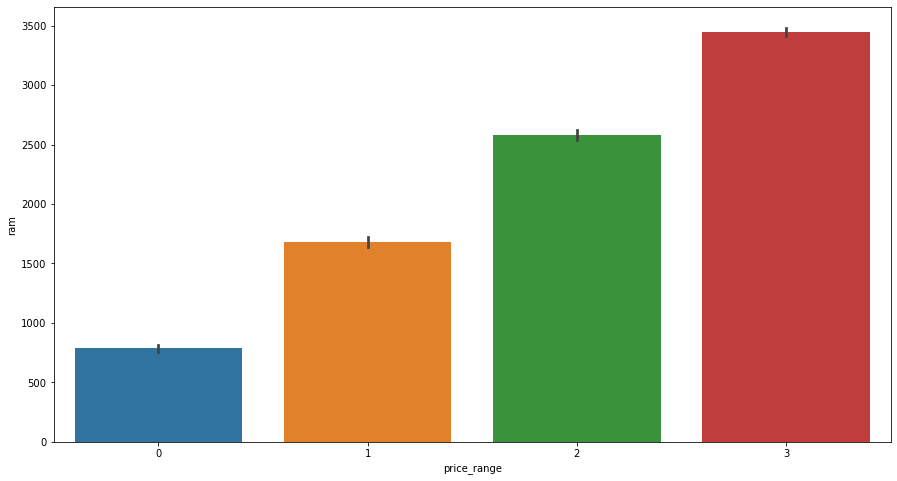

In [19]:
# create a barplot for price_range and ram
sns.barplot('price_range', 'ram', data=df_mobile)

**Interpretation:** The price of the mobile increases as the ram increases.

# Correlation

In [20]:
corrmat = df_features.corr()
corrmat

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720


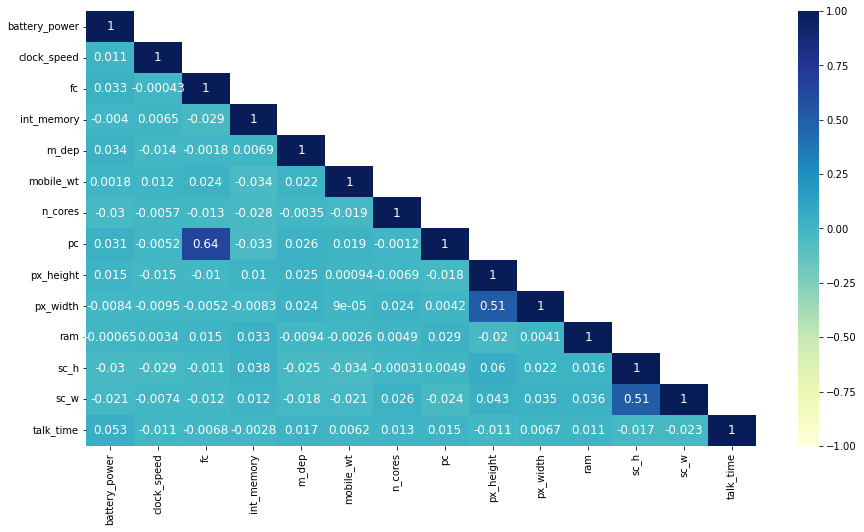

In [21]:
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True
sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

plt.show()

# Discover Outliers 

Plot the boxplot for numeric data

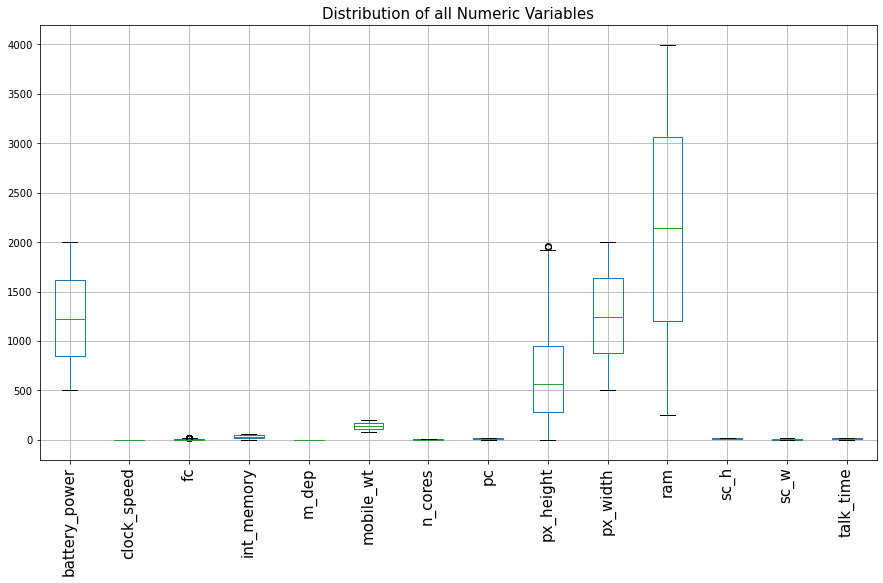

In [22]:
df_features.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

#### Some boxplots of variables are not seen because of the extreme values im other variables. So let's plot a separate boxplot for these variables

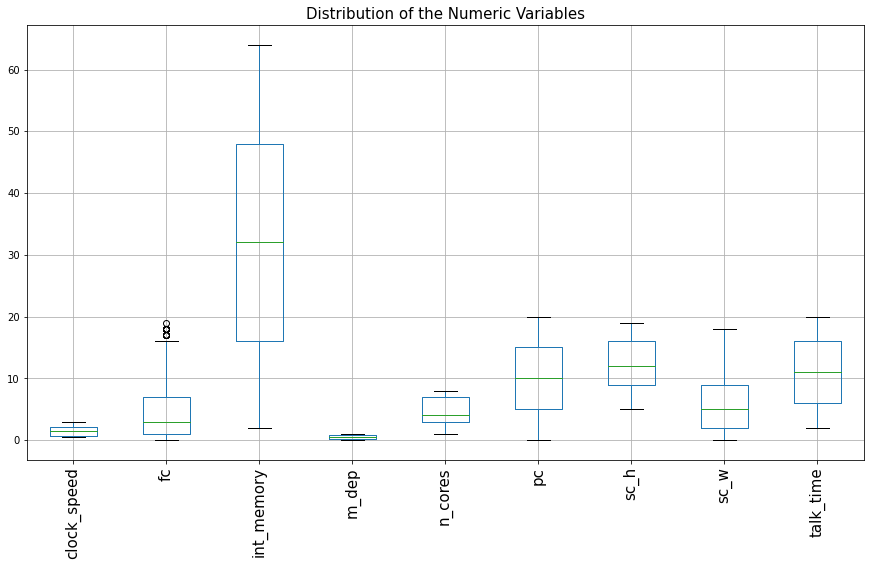

In [23]:
df_features.drop(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], axis = 1).boxplot()
plt.title('Distribution of the Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

**We can see that only 'fc' and 'px_height' have a few outliers. But they are not visible clearly. So we will plot separate boxplots for these two. Otherwise all the other variables do not have any outliers**

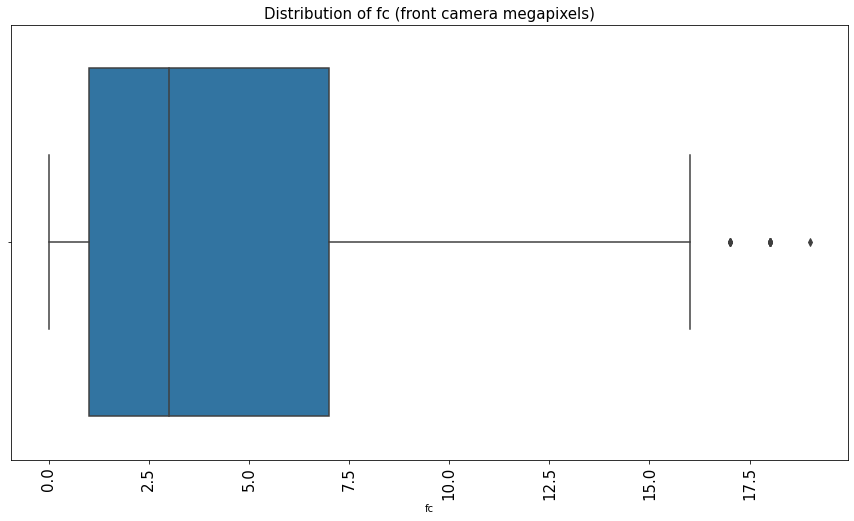

In [24]:
# plot boxplots for fc
sns.boxplot(df_features['fc'])
plt.title('Distribution of fc (front camera megapixels)', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

In [ ]:
# plot boxplots for fc
sns.boxplot(df_features['px_height'])
plt.title('Distribution of px_height', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

# Remove outliers by IQR method

In [26]:
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64


In [27]:
df_mobile.shape

(2000, 15)

In [28]:
df_mobile = df_mobile[~((df_mobile < (Q1 - 1.5 * IQR)) | (df_mobile > (Q3 + 1.5 * IQR))).any(axis=1)]
df_mobile = df_mobile.reset_index(drop = True)

In [29]:
df_mobile.shape

(1980, 15)

In [30]:
print(df_mobile[~((df_mobile < (Q1 - 1.5 * IQR)) | (df_mobile > (Q3 + 1.5 * IQR))).any(axis=1)])

      battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
0               842          2.2   1           7    0.6        188        2   
1              1021          0.5   0          53    0.7        136        3   
2               563          0.5   2          41    0.9        145        5   
3               615          2.5   0          10    0.8        131        6   
4              1821          1.2  13          44    0.6        141        2   
5              1859          0.5   3          22    0.7        164        1   
6              1821          1.7   4          10    0.8        139        8   
7              1954          0.5   0          24    0.8        187        4   
8              1445          0.5   0          53    0.7        174        7   
9               509          0.6   2           9    0.1         93        5   
10              769          2.9   0           9    0.1        182        5   
11             1520          2.2   5          33    

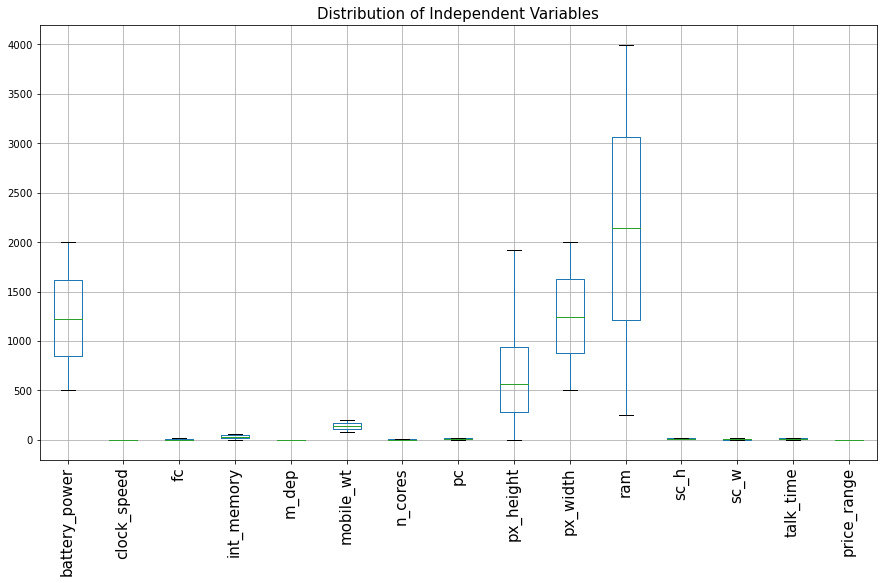

In [31]:
# plot multiple boxplots
df_mobile.boxplot()
plt.title('Distribution of Independent Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data.

In [32]:
df_mobile.shape

(1980, 15)

# Missing Values

In [33]:
Total = df_mobile.isnull().sum().sort_values(ascending = False)          
Percent = (df_mobile.isnull().sum()*100/df_mobile.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
battery_power,0,0.0
clock_speed,0,0.0
fc,0,0.0
int_memory,0,0.0
m_dep,0,0.0
mobile_wt,0,0.0
n_cores,0,0.0
pc,0,0.0
px_height,0,0.0
px_width,0,0.0


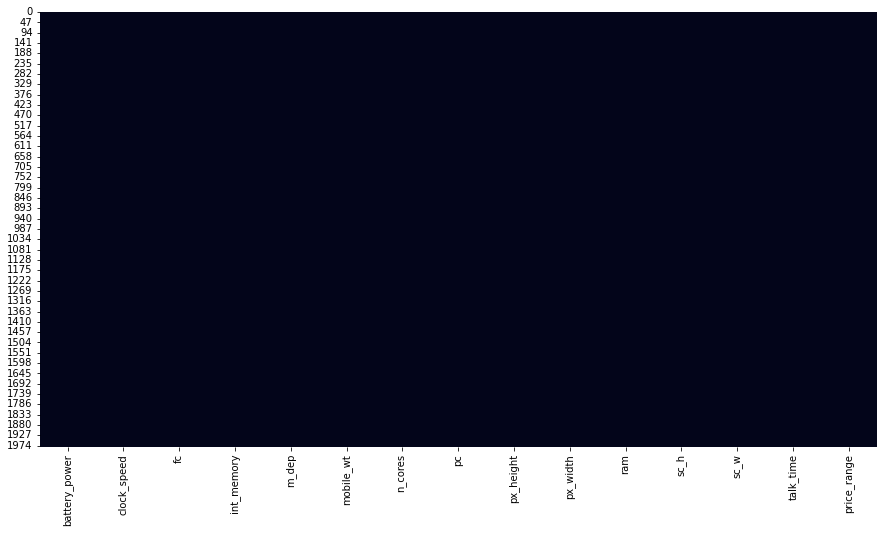

In [34]:
sns.heatmap(df_mobile.isnull(), cbar=False)
plt.show()

The horizontal lines in the heatmap correspond to the missing values. But there are no such line. This means there are no missing values.

In [2]:
# store the target variable in the variable 'y'
#y = df_mobile.price_range
# drop the target variable from the dataframe
#df_mobile = df_mobile.drop('price_range', axis = 1)

# Prepare the Data

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [37]:
df_num = df_mobile.apply(lambda rec: (rec - rec.mean()) / rec.std())
df_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


In [38]:
X = df_num.copy()

In [39]:
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215


We can create a generalized function to calculate the performance metrics for the test set.

In [40]:
# we have to create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    test_pred = model.predict(X_test)
    # return the classification report for test data
    return(classification_report(y_test, test_pred))

Now we have to Define a function to plot the confusion matrix.

In [41]:
def plot_confusion_matrix(model):
    
    # predict the target values using X_test
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1', 'Predicted:2','Predicted:3'],\
                               index = ['Actual:0','Actual:1', 'Actual:2','Actual:3'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

# K Nearest Neighbors 

Split the dataset into train and test sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)
print("X_train",X_train.shape)
print("y_train",y_train.shape)

print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1386, 14)
y_train (1386,)
X_test (594, 14)
y_test (594,)


In [43]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

confusion matrix.

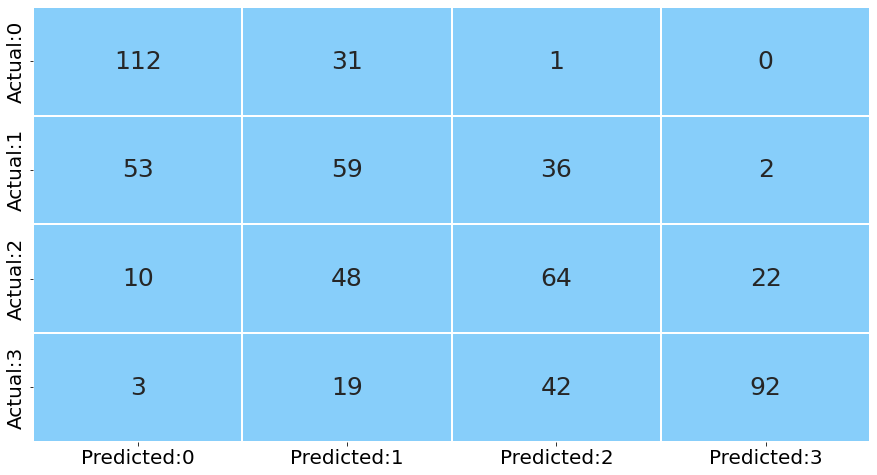

In [44]:
plot_confusion_matrix(knn_model)

performance measures on the test set

In [45]:
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       144
           1       0.38      0.39      0.38       150
           2       0.45      0.44      0.45       144
           3       0.79      0.59      0.68       156

    accuracy                           0.55       594
   macro avg       0.56      0.55      0.55       594
weighted avg       0.56      0.55      0.55       594



**Interpretation:** The accuracy is 55% for this model.

# Optimal Value of K (using GridSearchCV)

In [46]:
tuned_paramaters = {'n_neighbors': np.arange(1, 35,1),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 

knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 30} 



Line plot to see the error rate for each value of K using euclidean distance as a metric of KNN model

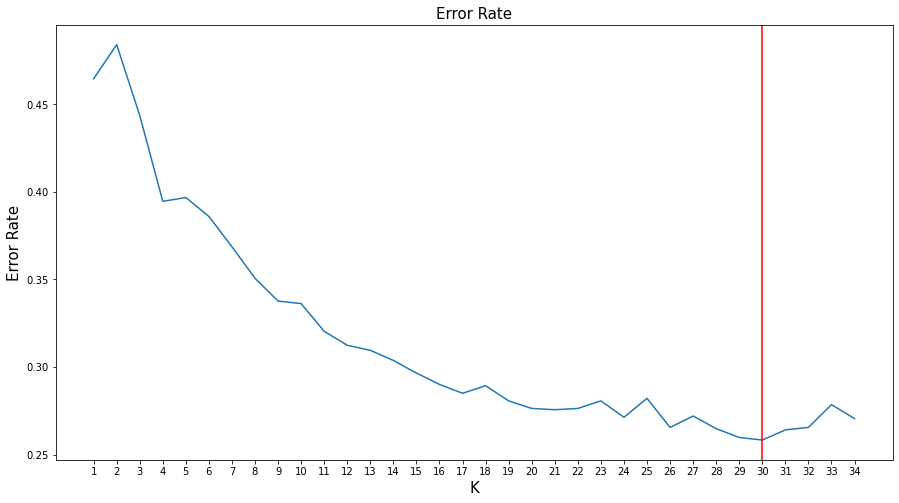

In [47]:
# consider an empty list to store error rate
error_rate = []

for i in np.arange(1,35,1):
    knn = KNeighborsClassifier(i, metric = 'manhattan')
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # mean score
    score = score.mean()
    
    # error rate 
    error_rate.append(1 - score)

plt.plot(range(1,35,1), error_rate)
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)


plt.xticks(np.arange(1, 35, step = 1))
plt.axvline(x = 30, color = 'red')
plt.show()

**Interpretation:** We can see that the optimal value of K (= 21) obtained from the GridSearchCV() results in a lowest error rate. 

**Interpretation:** when we use K-35, the lowest error is at 30


# Calculate performance measures on the test set

In [48]:
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       144
           1       0.67      0.59      0.63       150
           2       0.59      0.68      0.63       144
           3       0.88      0.72      0.79       156

    accuracy                           0.72       594
   macro avg       0.73      0.72      0.72       594
weighted avg       0.73      0.72      0.72       594



**Interpretation:** The accuracy is 71% for this model.

# **Kappa score for knn_model**

In [49]:
y_pred = knn_model.predict(X_test)

In [50]:
kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

kappa value: 0.40144018477842447


As, the kappa score for the KNN model is 0.4014, we can say that there is fair agrrement between the actual and predicted values.

# Kappa score tuned KNN model (knn_grid)

In [51]:
y_pred = knn_grid.predict(X_test)

In [52]:
kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

kappa value: 0.6278616879146759


As, the kappa score for the KNN model is 0.62, we can say that there is Good agrrement between the actual and predicted values.